In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
#import sklearn
import hdbscan
# Dim reduction
from sklearn.manifold import TSNE
# Summarization


# src
from src.embed import get_embeddings

In [2]:
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\Tech Abstracts\\data\\"
filename = "2023 Tech Showcase Abstracts - with flags.csv"

df = pd.read_csv(str(filepath)+str(filename))

In [3]:
## VARIABLES

TEXT_FIELD = "Abstract Text (limit to 250 words)"

In [4]:
df.head()

,Selected,year,Abstract Title,Abstract Text (limit to 250 words)
0,Yes,2023,Scaling Aircraft-Based Methane Detection acros...,Methane emission reductions from the oil and g...
1,NaN,2023,Development and Deployment of Chevron's Fractu...,Embedded Discrete Fracture Modeling (EDFM) is ...
2,yes,2023,Hydrogen Must Win Technology Challenge linkage...,Chevron aims to leverage our strengths to deli...
3,Yes,2023,Leveraging the Digital Oilfield: Optimizing Op...,"The Tech Center, in collaboration with PE and ..."
4,NaN,2023,Leveraging Technology to Improve Hydraulic Fra...,"Development and deployment of fit-for-purpose,..."


## Embed Text

In [5]:
# Generate embeddings
abstracts = df[TEXT_FIELD].to_list()
embeddings = get_embeddings(abstracts)

## Cluster Text

In [6]:
# HDBScan
hdb = hdbscan.HDBSCAN(
    min_samples=2, 
    min_cluster_size=2,
    allow_single_cluster=False
    #store_centers="medoid"
    ).fit(embeddings)

In [7]:
df['Cluster Label'] = hdb.labels_
df['Cluster Probability'] = hdb.probabilities_

#print(len(hdb.medoids_))

df['Cluster Label'].value_counts()

-1    81
 2    19
 1     7
 0     3
Name: Cluster Label, dtype: int64

In [8]:
#sns.displot(df['Cluster Probability'])

## Reduce Embedding Dimensions

In [9]:
tsne = TSNE(
    n_components=2,
    perplexity=10,
    n_iter=5000,
    init = "pca",
    random_state = 0
)
reduced_embeddings = tsne.fit_transform(embeddings)

c:\ProgramData\Miniconda3\envs\nlp_cluster\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\ProgramData\Miniconda3\envs\nlp_cluster\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


## Summarize Clusters

In [10]:
def select_top_k(data, cluster_label):
    temp_df = data[data['Cluster Label']==cluster_label]
    temp_df = temp_df.nlargest(3, columns='Cluster Probability', keep='first')
    return temp_df

In [11]:
check = select_top_k(df, 0)
check

,Selected,year,Abstract Title,Abstract Text (limit to 250 words),Cluster Label,Cluster Probability
13,NaN,2023,Basin Scale Screening Workflows for Carbon Sto...,Carbon capture and storage (CCS) has emerged a...,0,1.0
31,NaN,2023,Fast CO2 Plume Modeling for Early CCS Site Cha...,Assessing the CO2 storage potential and the CO...,0,1.0
60,NaN,2023,PlumeFlow: Rapid CCS Simulation and Monitoring...,In Carbon Capture and Storage (CCS) one must s...,0,1.0


In [12]:
df['Cluster Label'].value_counts()

-1    81
 2    19
 1     7
 0     3
Name: Cluster Label, dtype: int64

## Visualize Plot

c:\ProgramData\Miniconda3\envs\nlp_cluster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


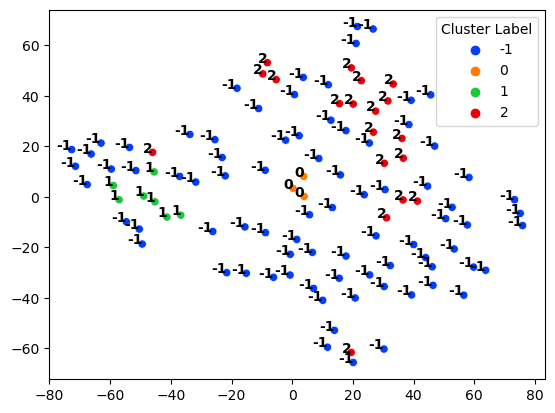

In [15]:
p1 = sns.scatterplot(reduced_embeddings[:,0], reduced_embeddings[:,1], hue=df['Cluster Label'], legend='full', palette="bright")

for line in range(0,df.shape[0]):
     p1.text(reduced_embeddings[:,0][line]+0.01, reduced_embeddings[:,1][line], 
     df['Cluster Label'][line], 
     horizontalalignment='right', 
     size='medium', 
     color='black', 
     weight='semibold')

In [ ]:
plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1])